# Learning graph from data

In [1]:
## import module
from CGmodelselection.graph import get_graph_from_data

**Specify the data to be used**

Specify filename an optionally columns that shall not be loaded in the variable *drop*.

In [3]:
## chose one dataset here (or enter your own), list columns not to be loaded in variable <drop>
#filename = "unittest_data/australian-crabs.csv"
#drop =['index']

filename = "embedded_datasets/mpg_tsne.csv"#datasets/house_complete.csv"
drop = []

#filename = "datasets/titanic.csv"
#drop = ['PassengerId', 'Name', 'Ticket', 'SibSp', 'Parch']

In [5]:
import pandas as pd
df = pd.read_csv(filename, index_col=0)#, sep=',')
df.head()#df.to_csv("datasets/girona_hgi_cormophyta.csv")
#df.identifiedby = df.identifiedby.fillna('nan')
#sorted(df.identifiedby.unique())

,transmission,cylinder,car_size,year,mpg_city,mpg_highway,displacement,Emb_dim1,Emb_dim2
0,auto,few,small,1988,26.0,30.0,1.4760,29.406290,21.041817
1,auto,medium,large,2006,16.0,23.0,3.8000,4.151925,-27.600273
2,auto,medium,midsize,2002,16.0,19.0,2.5000,-12.074004,-15.322079
3,lock-up,medium,large,1994,11.0,15.0,5.2152,-33.844608,0.713295
4,auto,medium,large,2003,14.0,15.0,3.9000,-26.575397,-15.370603


In [6]:
df.columns

Index(['transmission', 'cylinder', 'car_size', 'year', 'mpg_city',
       'mpg_highway', 'displacement', 'Emb_dim1', 'Emb_dim2'],
      dtype='object')

Disable autoscrolling for outputs.

In [7]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

**Learn the (weighted) graph**

Filename:     transmission cylinder car_size  year  mpg_city  mpg_highway  displacement  \
0           auto      few    small  1988      26.0         30.0        1.4760   
1           auto   medium    large  2006      16.0         23.0        3.8000   
2           auto   medium  midsize  2002      16.0         19.0        2.5000   
3        lock-up   medium    large  1994      11.0         15.0        5.2152   
4           auto   medium    large  2003      14.0         15.0        3.9000   
5         manual   medium    large  1993      13.0         17.0        5.0020   
6           auto   medium    large  1999      15.0         19.0        4.3000   
7        lock-up      few  midsize  1992      18.0         23.0        1.8368   
8        lock-up      few  midsize  1987      19.0         29.0        2.4764   
9         manual      few    small  1996      21.0         29.0        1.9024   
10          auto   medium  midsize  2007      15.0         20.0        4.0000   
11          auto  

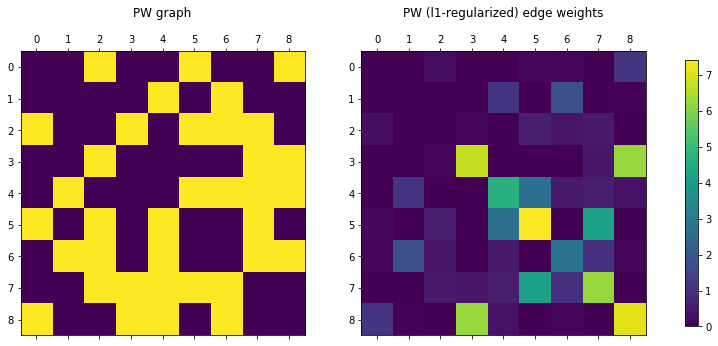

Legend:
0 - transmission
1 - cylinder
2 - car_size
3 - year
4 - mpg_city
5 - mpg_highway
6 - displacement
7 - Emb_dim1
8 - Emb_dim2


In [10]:
## parameters for graph estimation
standardize = True # standardize data before learning (recommended)
kS = 2 # trade-off parameter for l1-regularization term
model = 'PW' # choose from 'PW' (pairwise model) and 'CLZ' (CLZ model with triple interactions)
graphthreshold = 1e-1 # threshold for graph

## get matrix of group-norms (grpnormmat), graph (graph), and legend for row-/column names (dictionary dlegend)
grpnormmat, graph, dlegend = get_graph_from_data(df, drop = drop, model = model,
                                                 graphthreshold = graphthreshold, standardize = standardize, kS = kS)

**We might also want to rank the edges in terms of their respective edge weights (i.e., their corresponding group-norms).**

In [11]:
from CGmodelselection.graph import order_edges_by_weight

all_ordered_edges = order_edges_by_weight(grpnormmat, disp = True, graphthreshold = graphthreshold)


Edge	Edgeweight
8-3	6.26
7-5	4.18
5-4	2.71
6-1	1.82
8-0	1.14
4-1	1.13
7-6	1.07
5-2	0.63
7-4	0.62
6-4	0.54
7-2	0.53
7-3	0.44
6-2	0.44
8-4	0.36
2-0	0.27
5-0	0.17
3-2	0.11
8-6	0.10


In [12]:
# print all edges
all_ordered_edges

[(6.2588937843744032, (8, 3)),
 (4.1784229349159165, (7, 5)),
 (2.7068611135381531, (5, 4)),
 (1.8175192702633585, (6, 1)),
 (1.143032686541354, (8, 0)),
 (1.1272212222563165, (4, 1)),
 (1.0650504379398897, (7, 6)),
 (0.62723955228794215, (5, 2)),
 (0.61708465608241048, (7, 4)),
 (0.53667189777384217, (6, 4)),
 (0.53449905679051624, (7, 2)),
 (0.44038874258859845, (7, 3)),
 (0.43834690950185795, (6, 2)),
 (0.35878182059909092, (8, 4)),
 (0.26766554013863347, (2, 0)),
 (0.17008849745217106, (5, 0)),
 (0.10987499083810515, (3, 2)),
 (0.10102935095696761, (8, 6)),
 (0.08728546605327786, (6, 0)),
 (0.070325942600816468, (8, 1)),
 (0.017516028379936318, (8, 7)),
 (9.9672842193738025e-05, (7, 1)),
 (9.6145257074717018e-05, (3, 0)),
 (9.5269332063504757e-05, (1, 0)),
 (9.3309811738961866e-05, (8, 2)),
 (8.7135869990223944e-05, (5, 3)),
 (8.247250503855524e-05, (8, 5)),
 (8.1487889282495963e-05, (4, 0)),
 (6.3219589979313985e-05, (6, 3)),
 (5.8871483933793049e-05, (7, 0)),
 (5.4822166302250994